<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r14-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [ ]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-1-r14.csv?token=AKVFSOGB6S7RAKQUAAVTNXK63JIHY')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-11-r14.csv?token=AKVFSOH66ZAW6U6NJIEDAWK63JIH6')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-4-m-1-r14.csv?token=AKVFSOFIMTPJUYQO7H2LQUS63JIIC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-4-m-11-r14.csv?token=AKVFSOHTBSWBSXSB4MC2CJC63JIIG')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-6-m-1-r14.csv?token=AKVFSOB2JNQMUOJHGARU4E263JIIK')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-6-m-11-r14.csv?token=AKVFSOEEO7FMF6SQOWJ7DUK63JIIS')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-9-m-1-r14.csv?token=AKVFSOFQ4UMI5ZCQE6OMQYC63JIIY')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-9-m-11-r14.csv?token=AKVFSOAV4Z3AC2SXPUCJG7C63JIJA')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-normal-n-0-15-r14.csv?token=AKVFSOHJYT5RRJZ4HXHQ5RS63JIJG')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-normal-n-0-4-r14.csv?token=AKVFSOGIS4TAU7CNJRLAXEC63JIJM')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-normal-n-0-6-r14.csv?token=AKVFSOFADL7SF4FANRN3QFS63JIJW')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-normal-n-0-9-r14.csv?token=AKVFSOFZTZULGXLWKY4V6S263JIKA')

In [14]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(43400, 26)
(43609, 26)
(23323, 26)
(23538, 26)
(23851, 26)
(24066, 26)
(23323, 26)
(23538, 26)
(35505, 26)
(15416, 26)
(15936, 26)
(15416, 26)


In [ ]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r12-train.csv',index=False)

In [16]:
df = pd.read_csv('fft-r12-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,88,4,2,1,1,4,3,9,15,15,24,8,4,4,1,0.250000,8,14,1,14,14,8,16,3,27,0
1,88,4,2,1,1,4,3,9,15,15,24,8,3,4,1,0.250000,8,11,1,11,11,8,12,3,27,1
2,106,4,2,1,1,4,3,9,15,15,24,8,5,4,1,0.250000,8,14,1,14,14,8,20,3,27,0
3,206,3,2,1,1,4,3,9,15,15,22,6,7,3,1,0.333333,8,13,2,14,26,6,28,3,27,0
4,206,3,2,1,1,4,3,9,15,15,22,6,5,3,1,0.333333,8,10,2,11,20,6,20,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310916,3276659,3,2,5,2,2,3,9,15,15,22,6,30093,3,1,0.333333,15,5,15,19,75,6,601860,15,135,0
310917,3276666,3,2,5,3,2,3,9,15,15,22,6,30093,3,1,0.333333,22,4,16,19,64,6,902790,15,135,0
310918,3276673,3,2,5,4,2,3,9,15,15,22,6,30093,3,1,0.333333,29,3,17,19,51,6,1203720,15,135,0
310919,3276680,3,2,5,5,3,3,9,15,15,22,6,30093,3,1,0.333333,36,2,18,19,36,6,2256975,15,135,0


In [17]:
df.shape

(310921, 26)

Test Data

In [ ]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-12-r14.csv?token=AKVFSOCCWK2AKL76QQQFCWK63JIXI')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-7-r14.csv?token=AKVFSOFFLTHP6UWBLP76WXK63JIXM')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-4-m-12-r14.csv?token=AKVFSOEEOIMZMSB4ZGOHEZS63JIXQ')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-4-m-7-r14.csv?token=AKVFSOFDXPPLO7LKPID64NC63JIXY')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-6-m-12-r14.csv?token=AKVFSOFC72RSFH5THD7X2SK63JIX4')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-6-m-7-r14.csv?token=AKVFSOGX3QPOJQ365RI5ZIK63JIYA')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-9-m-12-r14.csv?token=AKVFSOCG4P5TBFIE47ZVHWS63JIYG')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-9-m-7-r14.csv?token=AKVFSOADWD2F6DDB4GMSQ6S63JIYK')

In [19]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(58074, 26)
(43609, 26)
(37649, 26)
(23538, 26)
(38183, 26)
(24052, 26)
(37655, 26)
(23538, 26)


In [20]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,737,0,3,1,1,4,3,9,6,6,30,14,25,2,2,1.0,12,9,1,9,9,0,100,3,27,0
1,745,2,0,2,1,4,3,9,30,14,27,11,25,2,0,0.0,4,8,2,9,16,0,200,6,54,0
2,792,0,3,1,1,4,3,9,1,1,30,14,26,4,4,1.0,20,7,3,9,21,0,104,3,27,0
3,800,0,3,3,1,4,3,9,27,11,30,14,25,2,2,1.0,12,6,4,9,24,0,300,9,81,0
4,800,2,0,2,1,4,3,10,30,14,27,11,26,2,0,0.0,4,5,5,9,25,0,208,6,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,3265395,2,0,6,4,2,3,12,30,14,27,11,30079,2,0,0.0,25,5,16,20,80,0,1443792,18,216,0
23847,3265402,2,0,6,5,3,3,12,30,14,27,11,30079,2,0,0.0,32,4,17,20,68,0,2707110,18,216,0
23848,3265403,2,0,2,1,4,3,9,30,14,27,11,30080,2,0,0.0,32,3,18,20,54,0,240640,6,54,0
23849,3265404,4,0,7,1,4,3,10,30,14,0,0,30079,5,0,0.0,6,2,19,20,38,0,842212,21,210,0


Processing

In [21]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [ ]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [23]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.247336,0.168274,-0.029203,0.042380,NaN,0.067293,0.015936,0.256807,-0.597277,-0.736595,-0.287124,-0.069458,0.031620,-0.028688,-0.026613,0.594917,0.028652,0.168274,0.176377,0.055000
inport,-0.247336,1.000000,-0.058563,0.031522,-0.045744,NaN,-0.511510,0.087387,0.370942,0.544438,0.574275,0.268187,0.025880,-0.191290,-0.125412,-0.099798,0.604385,0.050684,-0.058563,-0.206686,-0.014524
cache_coherence_type,0.168274,-0.058563,1.000000,0.360781,-0.523562,NaN,-0.102151,0.055788,0.015941,-0.192849,-0.268734,-0.456324,0.009937,-0.057830,-0.036312,-0.024724,0.095609,0.338162,1.000000,0.957191,-0.015069
flit_id,-0.029203,0.031522,0.360781,1.000000,-0.117511,NaN,-0.184246,0.019423,-0.008352,0.031525,-0.002138,0.519048,0.015034,0.003700,0.014204,0.025541,0.031445,0.702041,0.360781,0.303320,0.004628
flit_type,0.042380,-0.045744,-0.523562,-0.117511,1.000000,NaN,0.267376,-0.028186,0.012121,-0.045749,0.003103,0.376634,-0.159526,0.134812,-0.018738,-0.020003,-0.045632,0.050874,-0.523562,-0.440175,-0.006716
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.067293,-0.511510,-0.102151,-0.184246,0.267376,NaN,1.000000,-0.016500,-0.306814,-0.368217,-0.415661,-0.063290,-0.065798,0.145825,0.060675,0.053698,-0.328739,-0.087446,-0.102151,0.181787,-0.023004
traversal_id,0.015936,0.087387,0.055788,0.019423,-0.028186,NaN,-0.016500,1.000000,0.011016,0.001263,-0.001932,0.024748,0.095467,0.096285,0.145384,0.105063,0.089914,0.519087,0.055788,0.045921,-0.287225
hop_count,0.256807,0.370942,0.015941,-0.008352,0.012121,NaN,-0.306814,0.011016,1.000000,0.515706,0.140526,0.213377,-0.018100,-0.130603,-0.112745,-0.094589,0.421720,-0.001737,0.015941,-0.076277,0.038416
current_hop,-0.597277,0.544438,-0.192849,0.031525,-0.045749,NaN,-0.368217,0.001263,0.515706,1.000000,0.840709,0.462430,0.097554,-0.133184,-0.027014,-0.023392,-0.105876,-0.035851,-0.192849,-0.287561,-0.000506


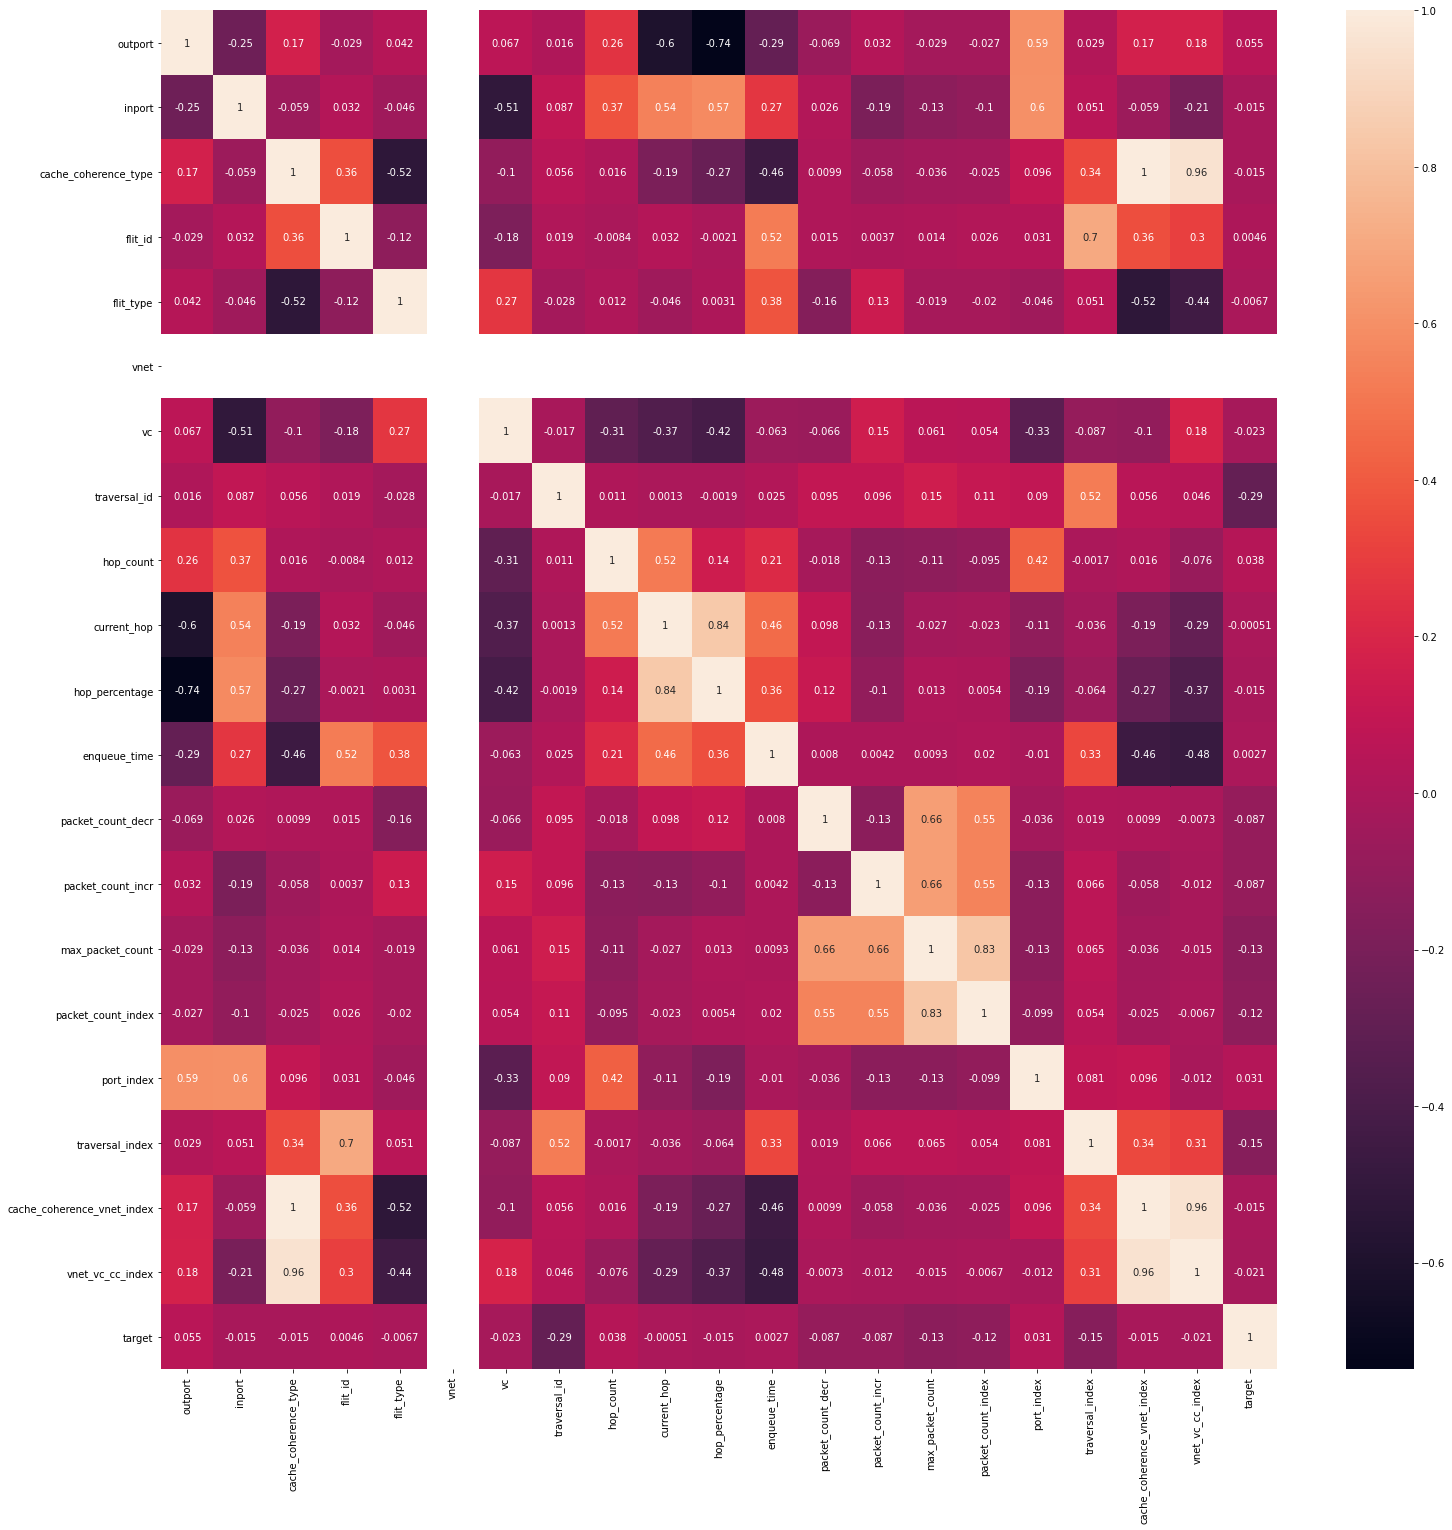

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [26]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [ ]:
#df = df.drop(columns=[''])

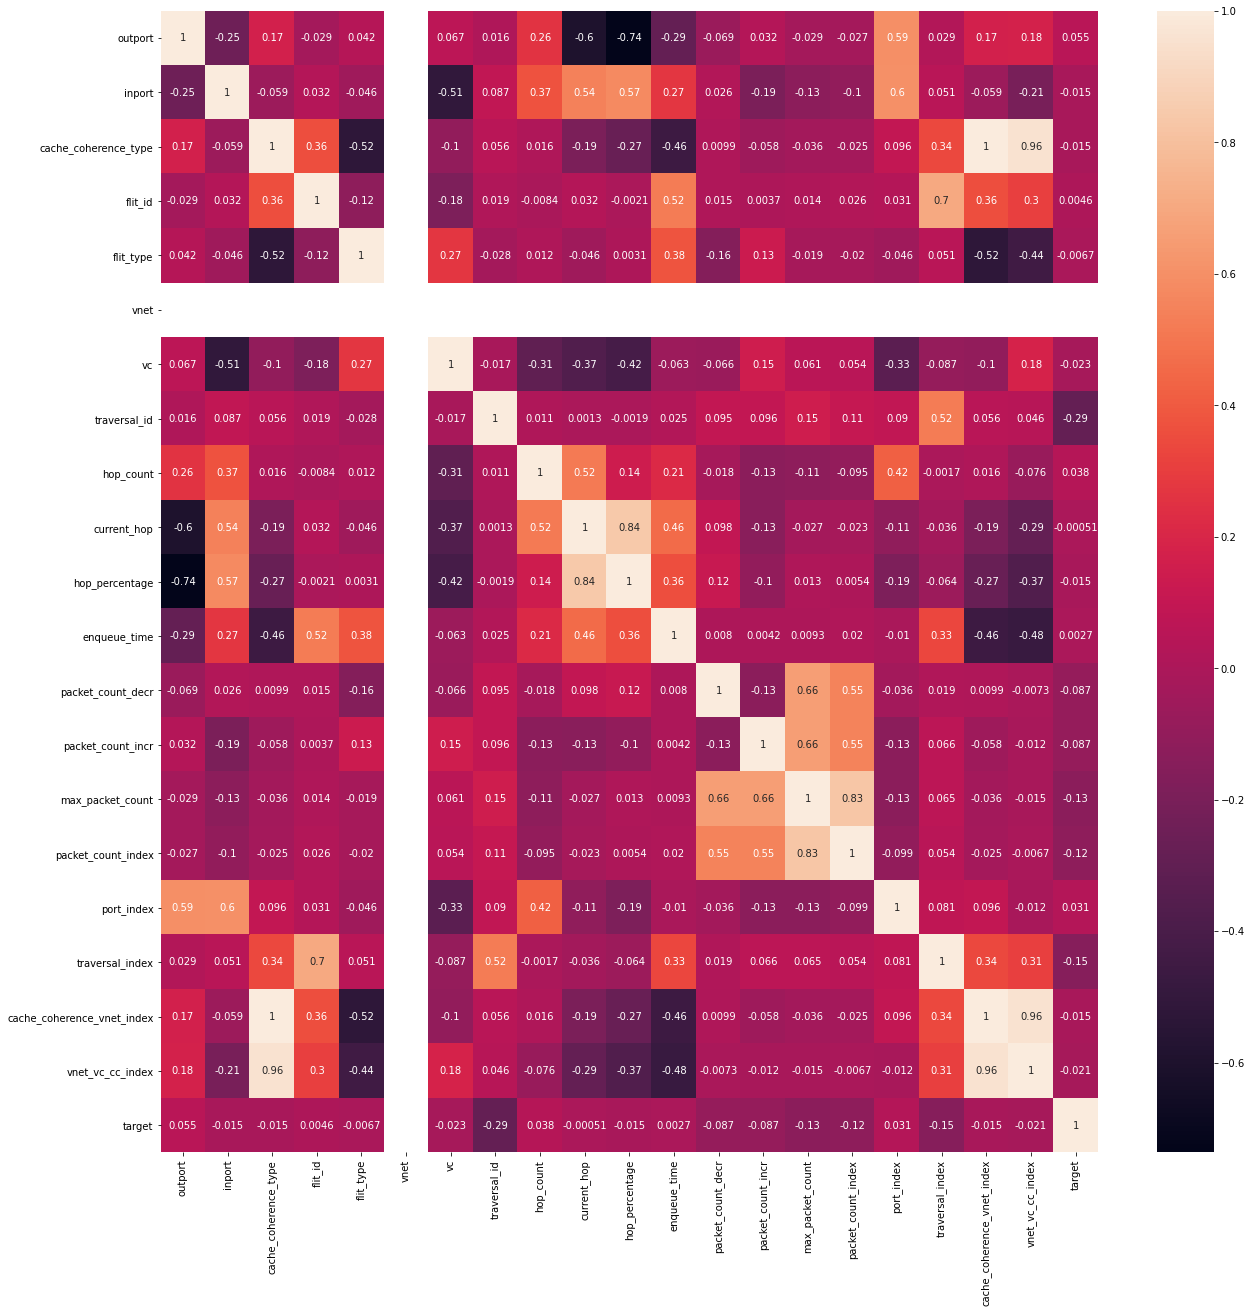

In [28]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

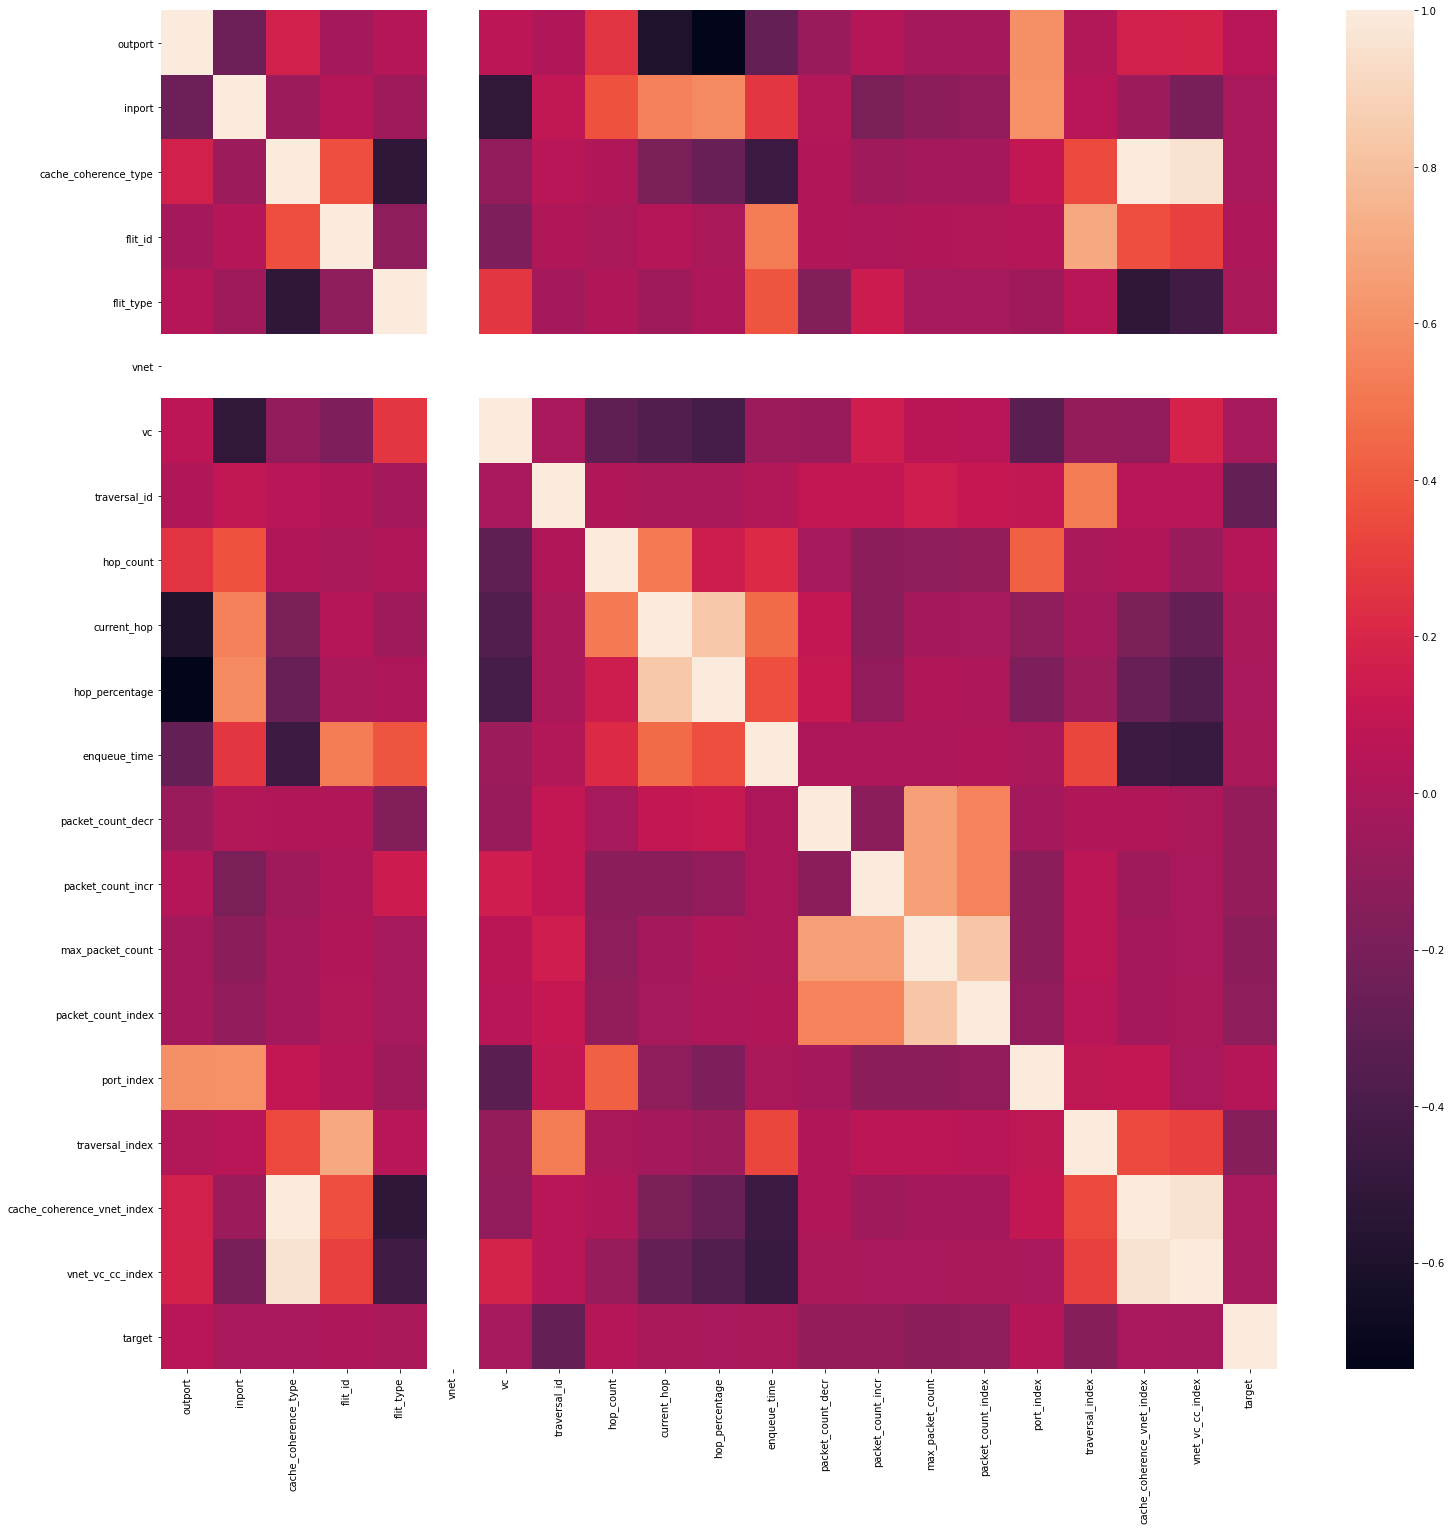

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [ ]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [31]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.6,0.2,0.250000,0.062500,0.13,0.00,0.13,0.005000,0.666667,0.000001,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.10,0.00,0.10,0.003846,0.666667,0.000000,0.000000,0.000000
2,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.6,0.2,0.250000,0.062500,0.13,0.00,0.13,0.005000,0.666667,0.000003,0.000000,0.000000
3,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000133,0.4,0.2,0.333333,0.062500,0.12,0.01,0.13,0.009615,0.500000,0.000006,0.000000,0.000000
4,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.4,0.2,0.333333,0.062500,0.09,0.01,0.10,0.007308,0.500000,0.000003,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310916,0.75,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.171875,0.04,0.14,0.18,0.028462,0.500000,0.222278,0.666667,0.480000
310917,0.75,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.281250,0.03,0.15,0.18,0.024231,0.500000,0.333419,0.666667,0.480000
310918,0.75,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.390625,0.02,0.16,0.18,0.019231,0.500000,0.444560,0.666667,0.480000
310919,0.75,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.500000,0.01,0.17,0.18,0.013462,0.500000,0.833554,0.666667,0.480000


In [32]:
train_X[train_X.duplicated()].shape

(3956, 20)

In [33]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.4,0.400000,0.126984,0.165049,0.000000,0.165049,0.006171,0.666667,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.6,0.2,0.250000,0.063492,0.155340,0.009709,0.165049,0.011978,0.666667,0.000003,0.000000,0.000000
2,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000166,0.4,0.2,0.333333,0.063492,0.145631,0.019417,0.165049,0.017060,0.500000,0.000007,0.000000,0.000000
3,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000233,0.6,0.4,0.500000,0.126984,0.135922,0.029126,0.165049,0.021416,1.000000,0.000010,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000333,0.8,0.4,0.400000,0.126984,0.126214,0.038835,0.165049,0.025045,0.666667,0.000015,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58069,0.75,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.174603,0.038835,0.126214,0.165049,0.025045,0.500000,0.222279,0.666667,0.480000
58070,0.75,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.285714,0.029126,0.135922,0.165049,0.021416,0.500000,0.333420,0.666667,0.480000
58071,0.75,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.396825,0.019417,0.145631,0.165049,0.017060,0.500000,0.444561,0.666667,0.480000
58072,0.75,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.507937,0.009709,0.155340,0.165049,0.011978,0.500000,0.833555,0.666667,0.480000


In [34]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [35]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [36]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [37]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [38]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [39]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [40]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [42]:
train_Y = df['target']
train_Y.value_counts()

0    228648
1     82273
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [ ]:
seed = 5
np.random.seed(seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  3057.571045
17             traversal_index  1107.404322
14            max_packet_count   445.449375
15          packet_count_index   401.838924
13           packet_count_incr   227.052478
12           packet_count_decr   218.439036
0                      outport   155.283554
16                  port_index    66.252267
6                           vc    64.328419
8                    hop_count    45.664684
10              hop_percentage    14.257046
1                       inport    12.007549
19            vnet_vc_cc_index    10.477108
2         cache_coherence_type     6.258621
18  cache_coherence_vnet_index     6.258621
4                    flit_type     3.641732
3                      flit_id     2.620318


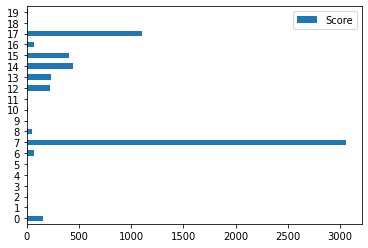

In [45]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
pickle.dump(dt, open("dt-r14.pickle.dat", 'wb'))

In [ ]:
y_pred_dt= dt.predict(X_test)

In [50]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.00123826064583
Test Prediction Score 95.80284634558173


In [51]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 83.76209663532734
Test Prediction Score 85.71395812790938
Test Prediction Score 83.53741135222715
Test Prediction Score 84.34021582122526
Test Prediction Score 82.16745672157766
Test Prediction Score 82.99101945784135
Test Prediction Score 82.10065064400479
Test Prediction Score 84.24250148695725


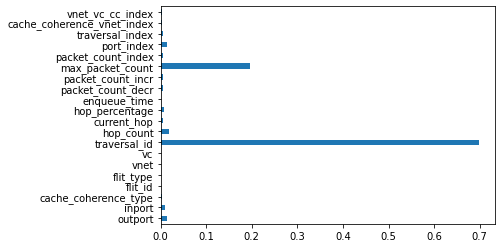

In [52]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

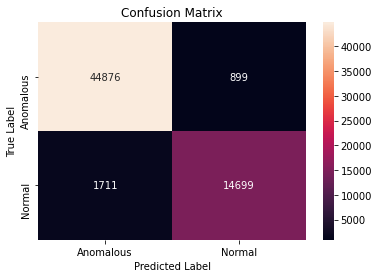

In [53]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     45775
           1       0.94      0.90      0.92     16410

    accuracy                           0.96     62185
   macro avg       0.95      0.94      0.95     62185
weighted avg       0.96      0.96      0.96     62185



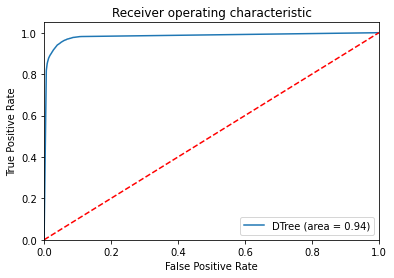

In [55]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [57]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pickle.dump(xgbc, open("xgbc-r14.pickle.dat", 'wb'))

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [68]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.95054998070243
Test Prediction Score 99.05121813942269


In [69]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.86069497537625
Test Prediction Score 88.17445940058245
Test Prediction Score 85.71011182235915
Test Prediction Score 86.99549664372505
Test Prediction Score 83.82526255139722
Test Prediction Score 86.10094794611675
Test Prediction Score 83.85340592218829
Test Prediction Score 85.50429093380916


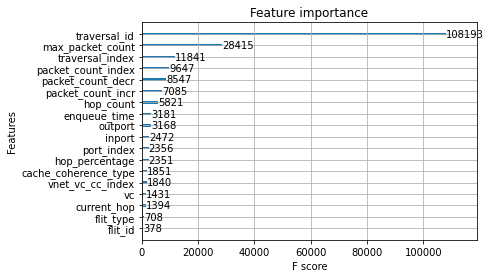

In [70]:
plot_importance(xgbc)
plt.show()

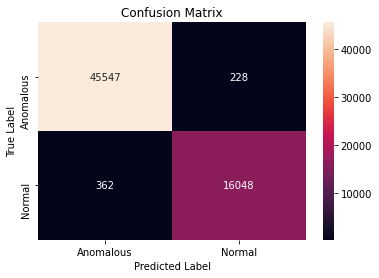

In [71]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     45775
           1       0.99      0.98      0.98     16410

    accuracy                           0.99     62185
   macro avg       0.99      0.99      0.99     62185
weighted avg       0.99      0.99      0.99     62185



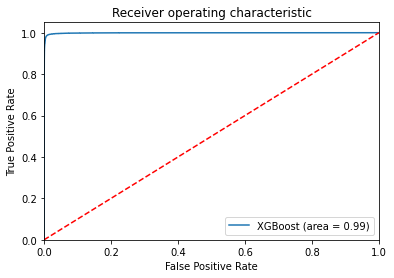

In [73]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()